In [3]:
import music21
import pathlib
music21.environment.set('musescoreDirectPNGPath', 
                        pathlib.PosixPath('/Applications/MuseScore 4.app/Contents/MacOS/mscore'))
from music2s1 import *

In [35]:
help(note.Note)


Help on class Note in module music21.note:

class Note(NotRest)
 |  Note(pitchName=None, **keywords)
 |  
 |  One of the most important music21 classes, a Note
 |  stores a single note (that is, not a rest or an unpitched element)
 |  that can be represented by one or more notational units -- so
 |  for instance a C quarter-note and a D# eighth-tied-to-32nd are both
 |  a single Note object.
 |  
 |  
 |  A Note knows both its total duration and how to express itself as a set of
 |  tied notes of different lengths. For instance, a note of 2.5 quarters in
 |  length could be half tied to eighth or dotted quarter tied to quarter.
 |  
 |  
 |  The first argument to the Note is the pitch name (with or without
 |  octave, see the introduction to :class:`music21.pitch.Pitch`).
 |  Further arguments can be specified as keywords (such as type, dots, etc.)
 |  and are passed to the underlying :class:`music21.duration.Duration` element.
 |  
 |  
 |  Two notes are considered equal if their most

In [2]:
nr = note.NotRest()
n = note.Note()
print(nr.beams, n.beams)


<music21.beam.Beams > <music21.beam.Beams >


In [3]:
class Japan:
    food = "sushi"
    drink = "sake"

class Okinawa(Japan):
    evenBetterFood = "spam potstickers"
o = Okinawa()
print(o.food, o.drink, o.evenBetterFood)

sushi sake spam potstickers


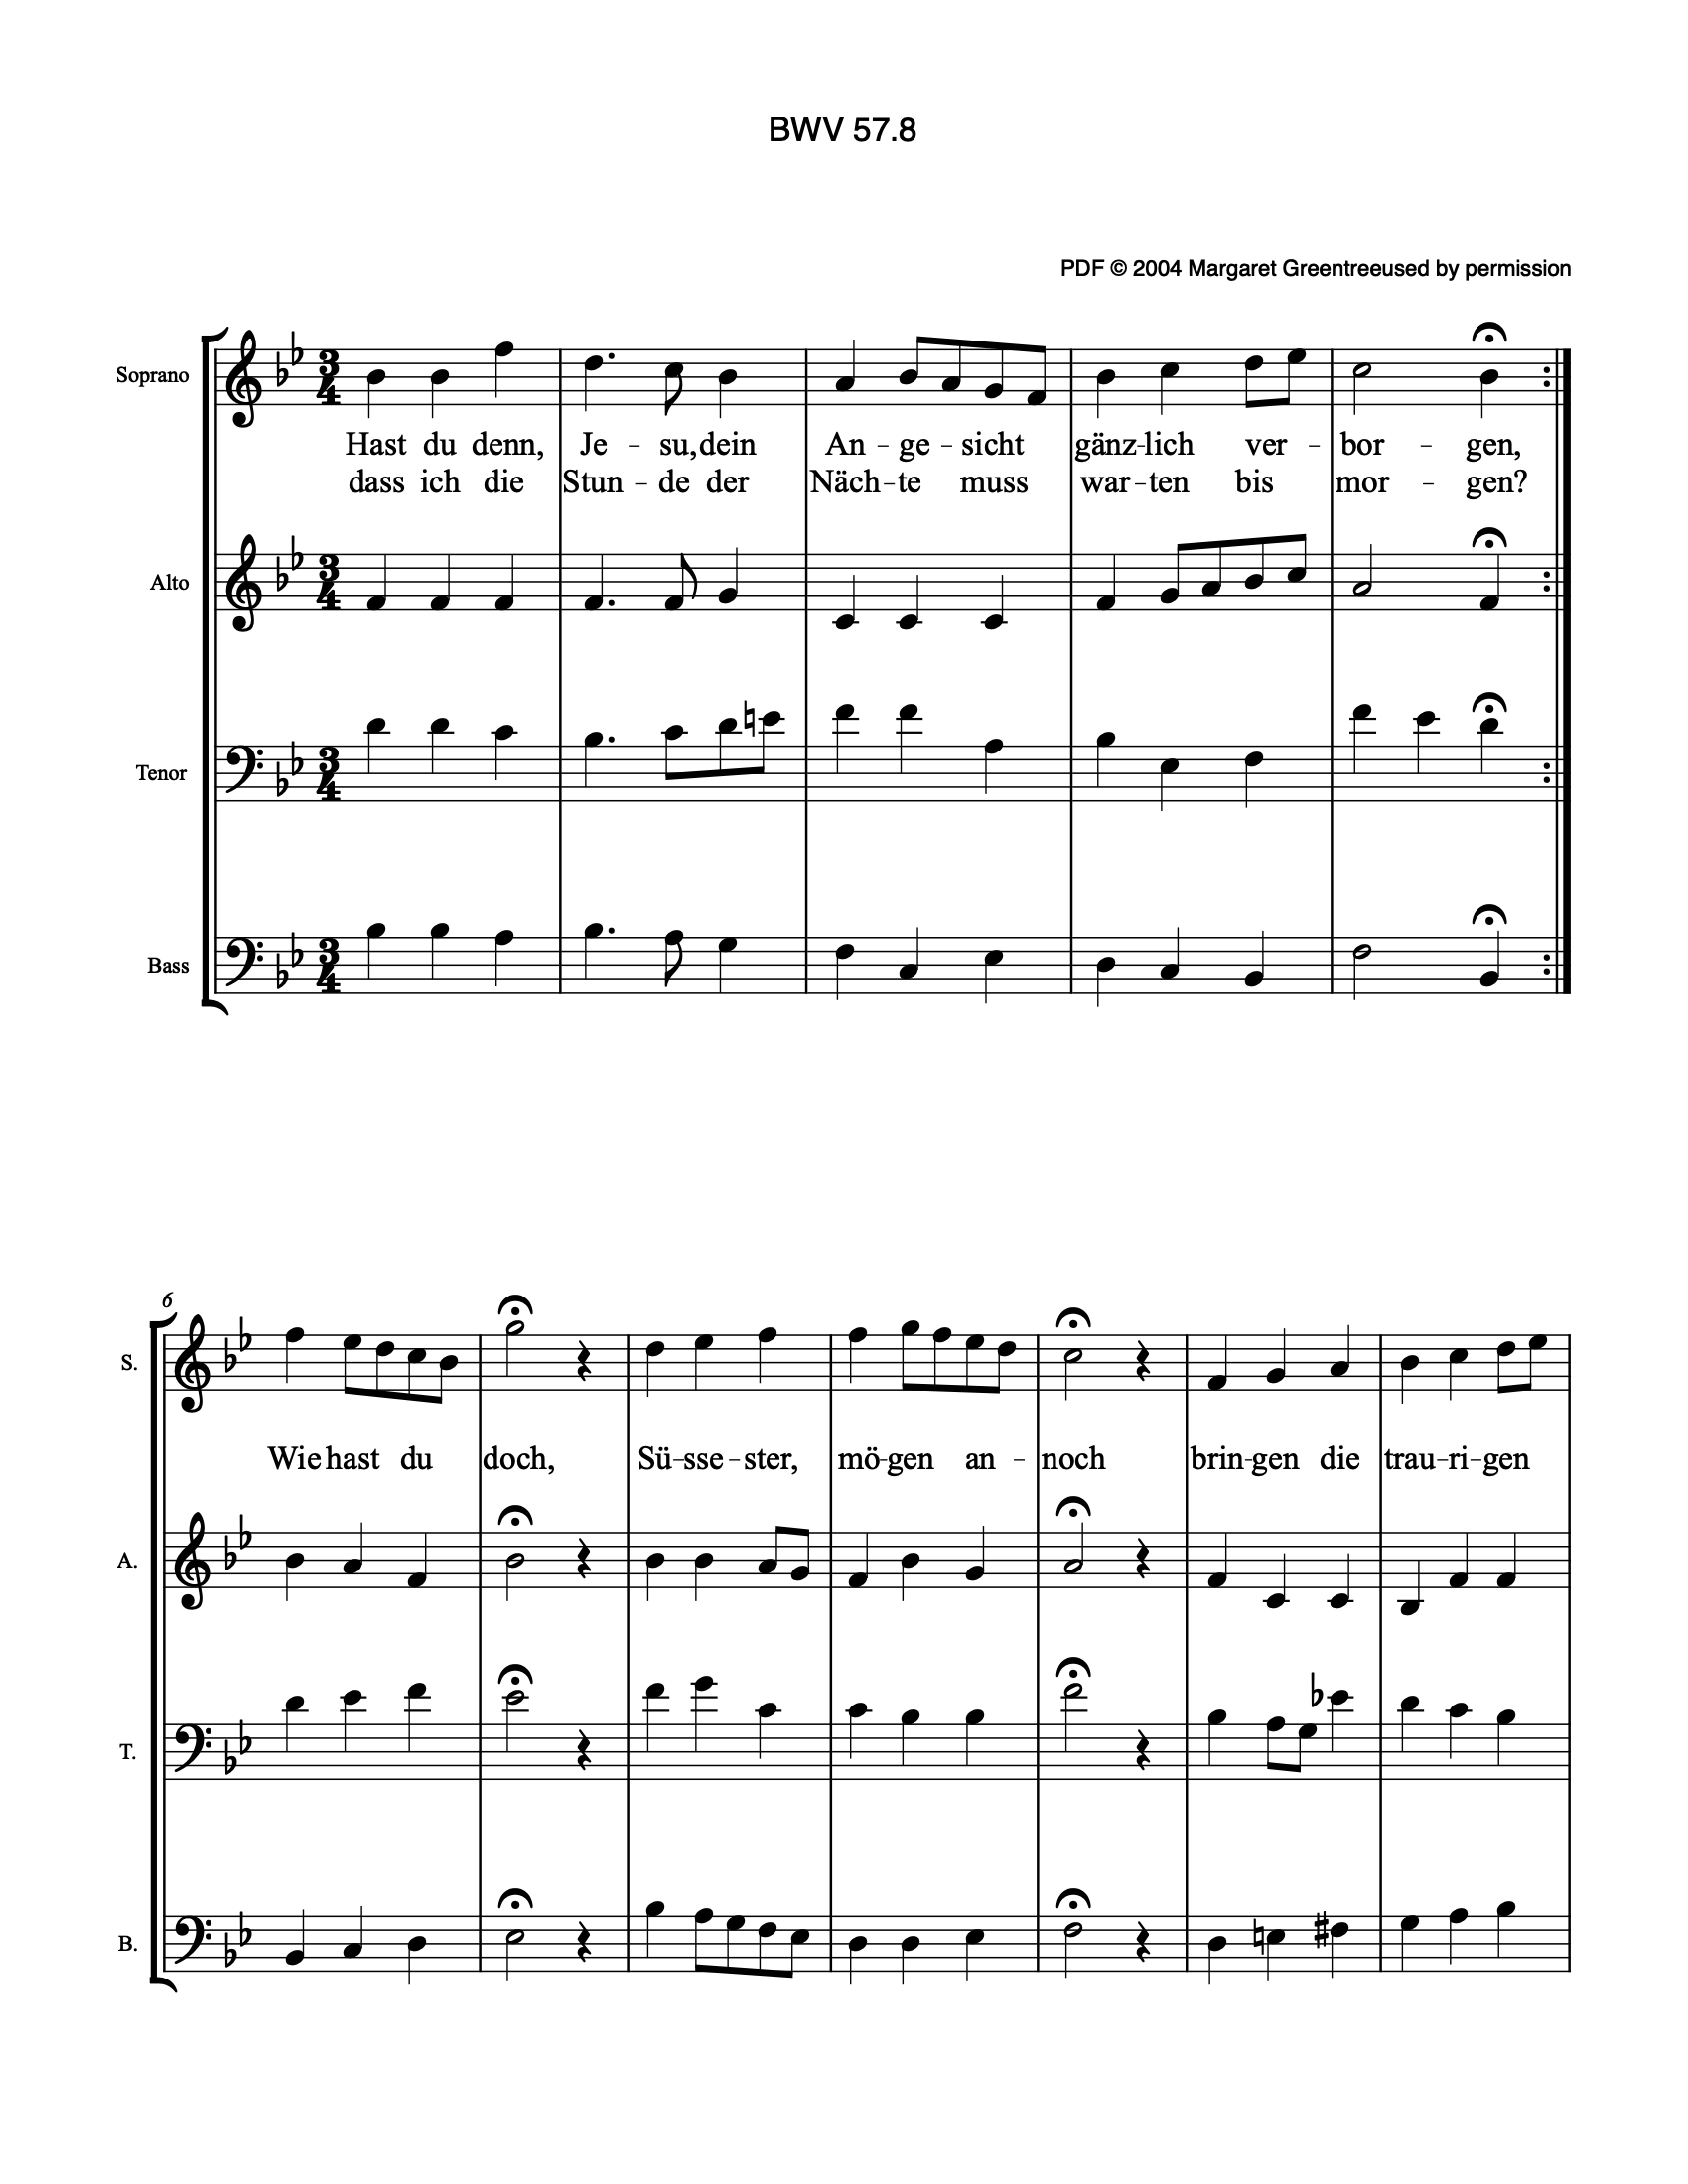

<music21.stream.iterator.StreamIterator for Score:0x117ebc520 @:0>

In [4]:
sBach = corpus.parse('bach/bwv57.8')
sBach.show()
len(sBach)
len(sBach[3])
len(sBach[3][1])
len(sBach.getElementsByClass(stream.Part))
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(
        stream.Measure)[1].getElementsByClass(note.Note))
sBach.parts


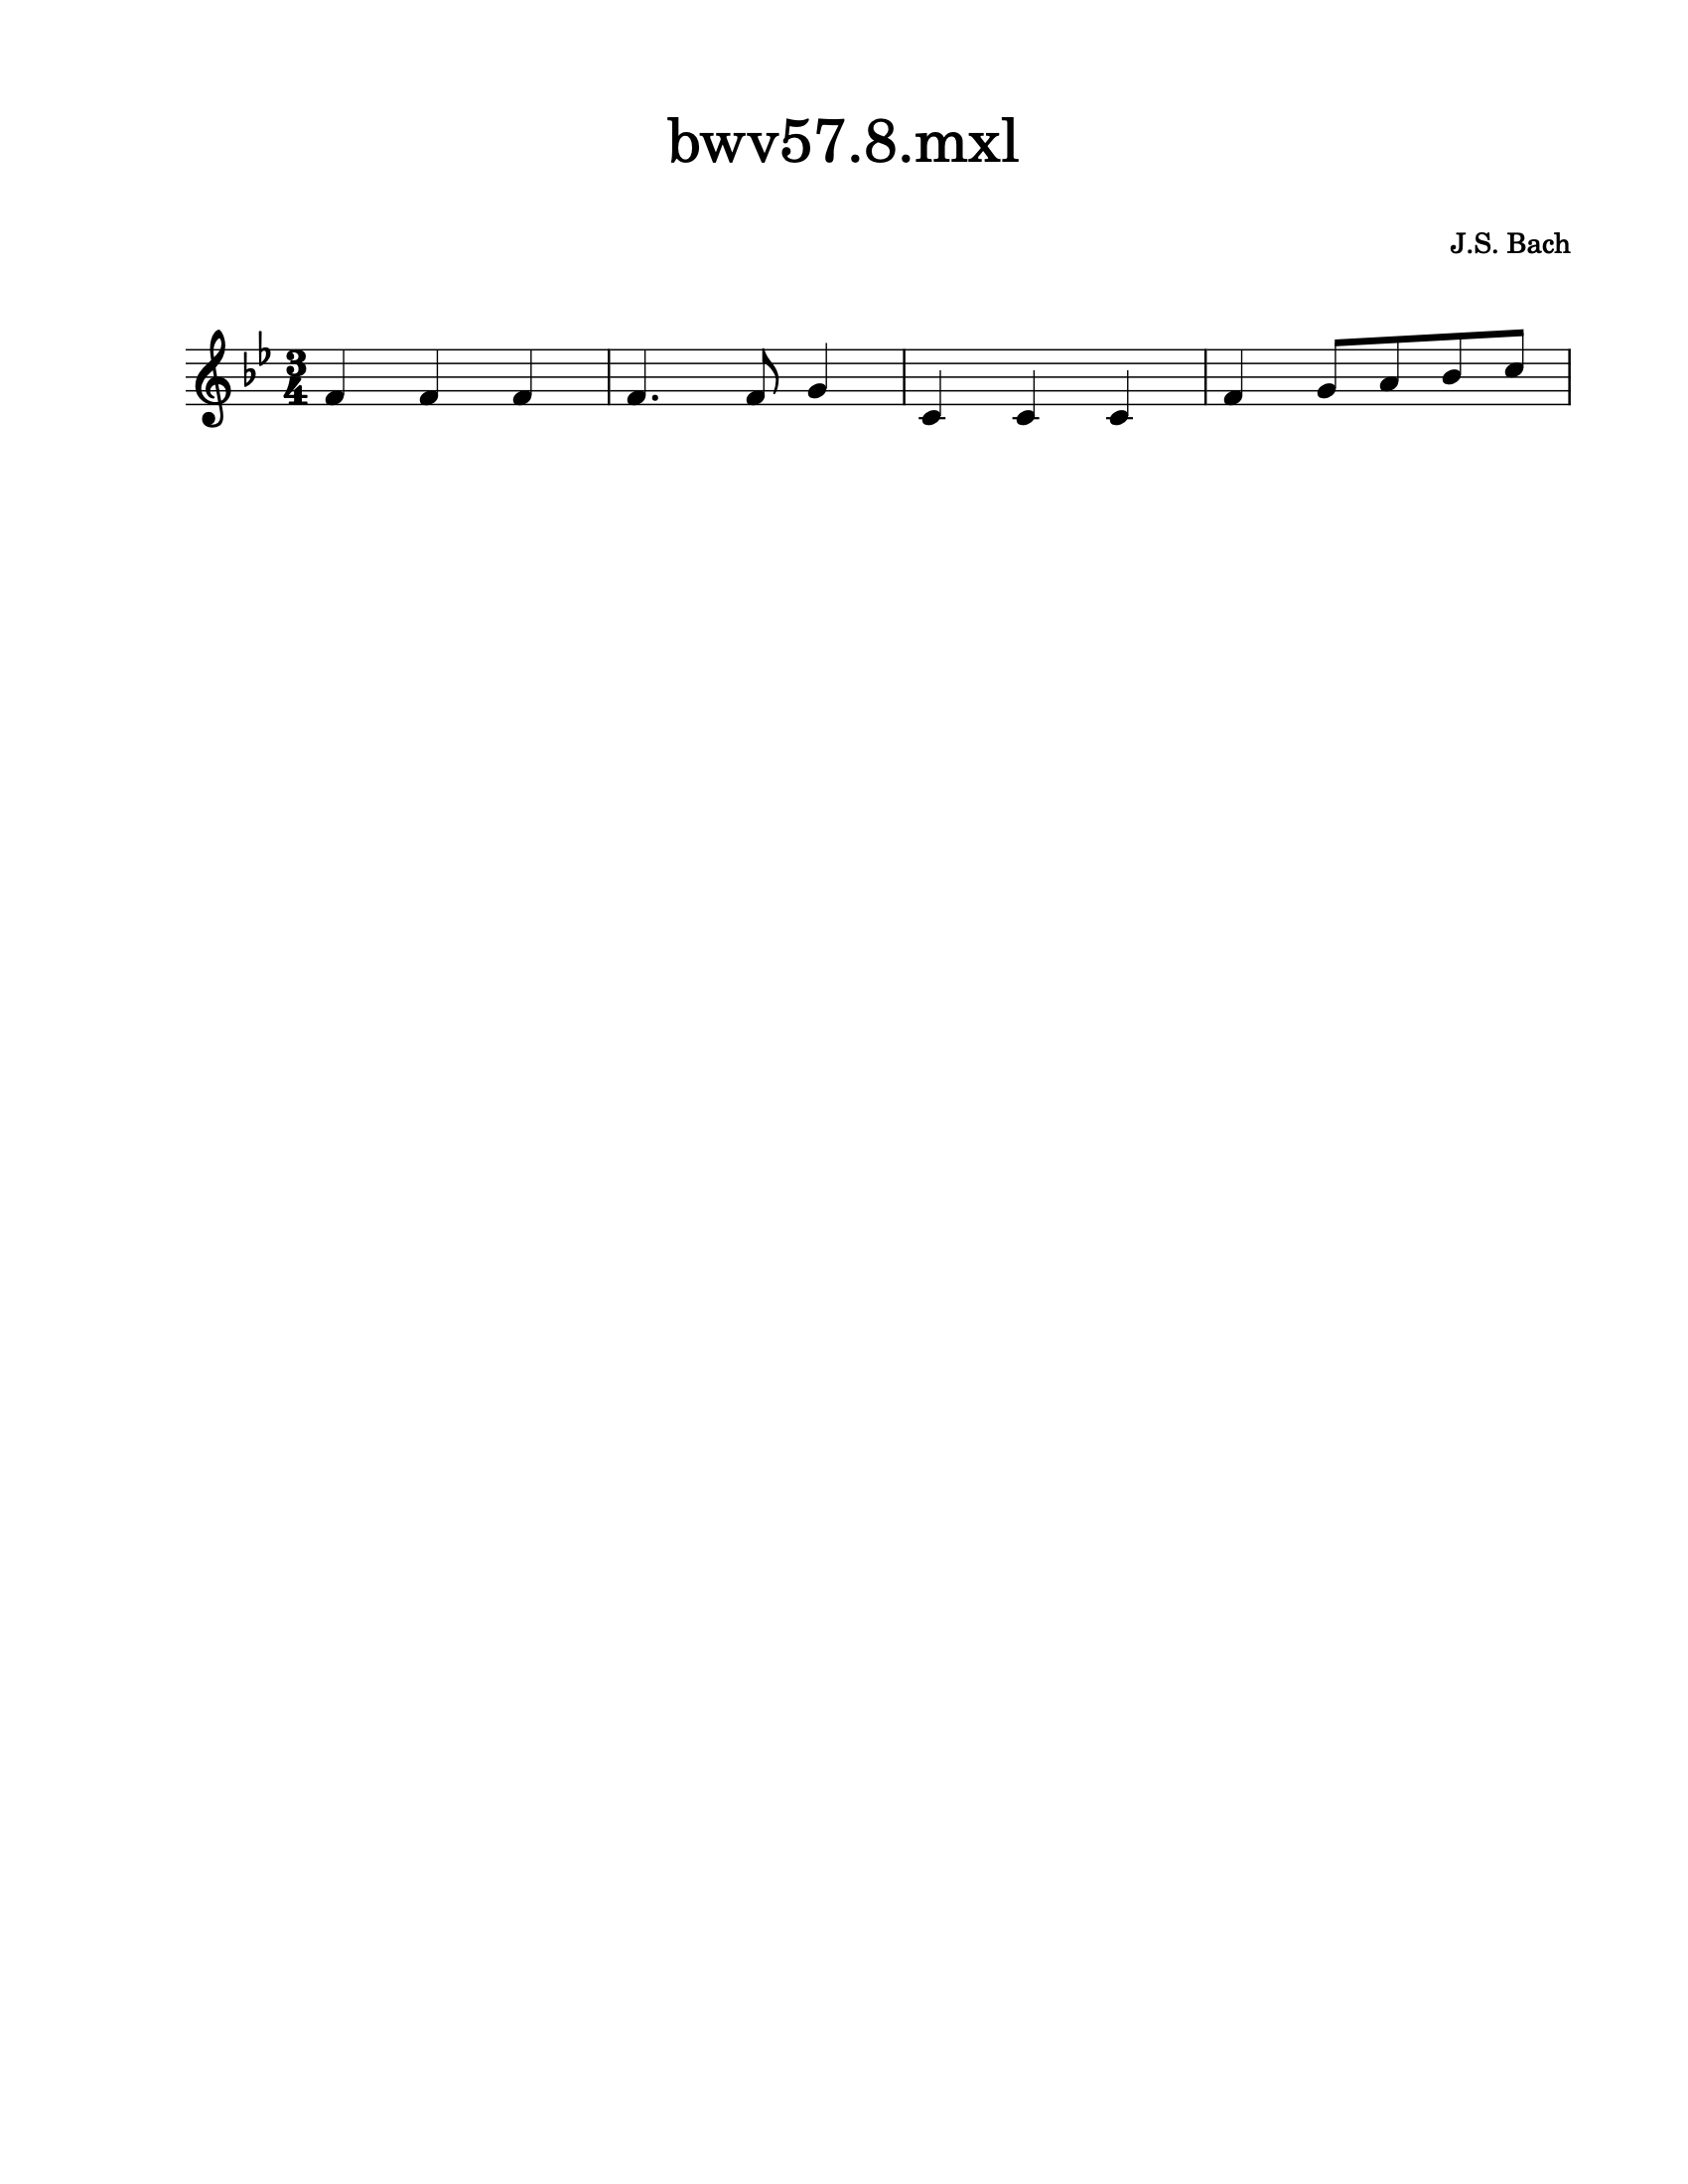

In [5]:
alto = sBach.parts[1]  # parts count from zero, so soprano is 0 and alto is 1
excerpt = alto.measures(1, 4)
excerpt.show()

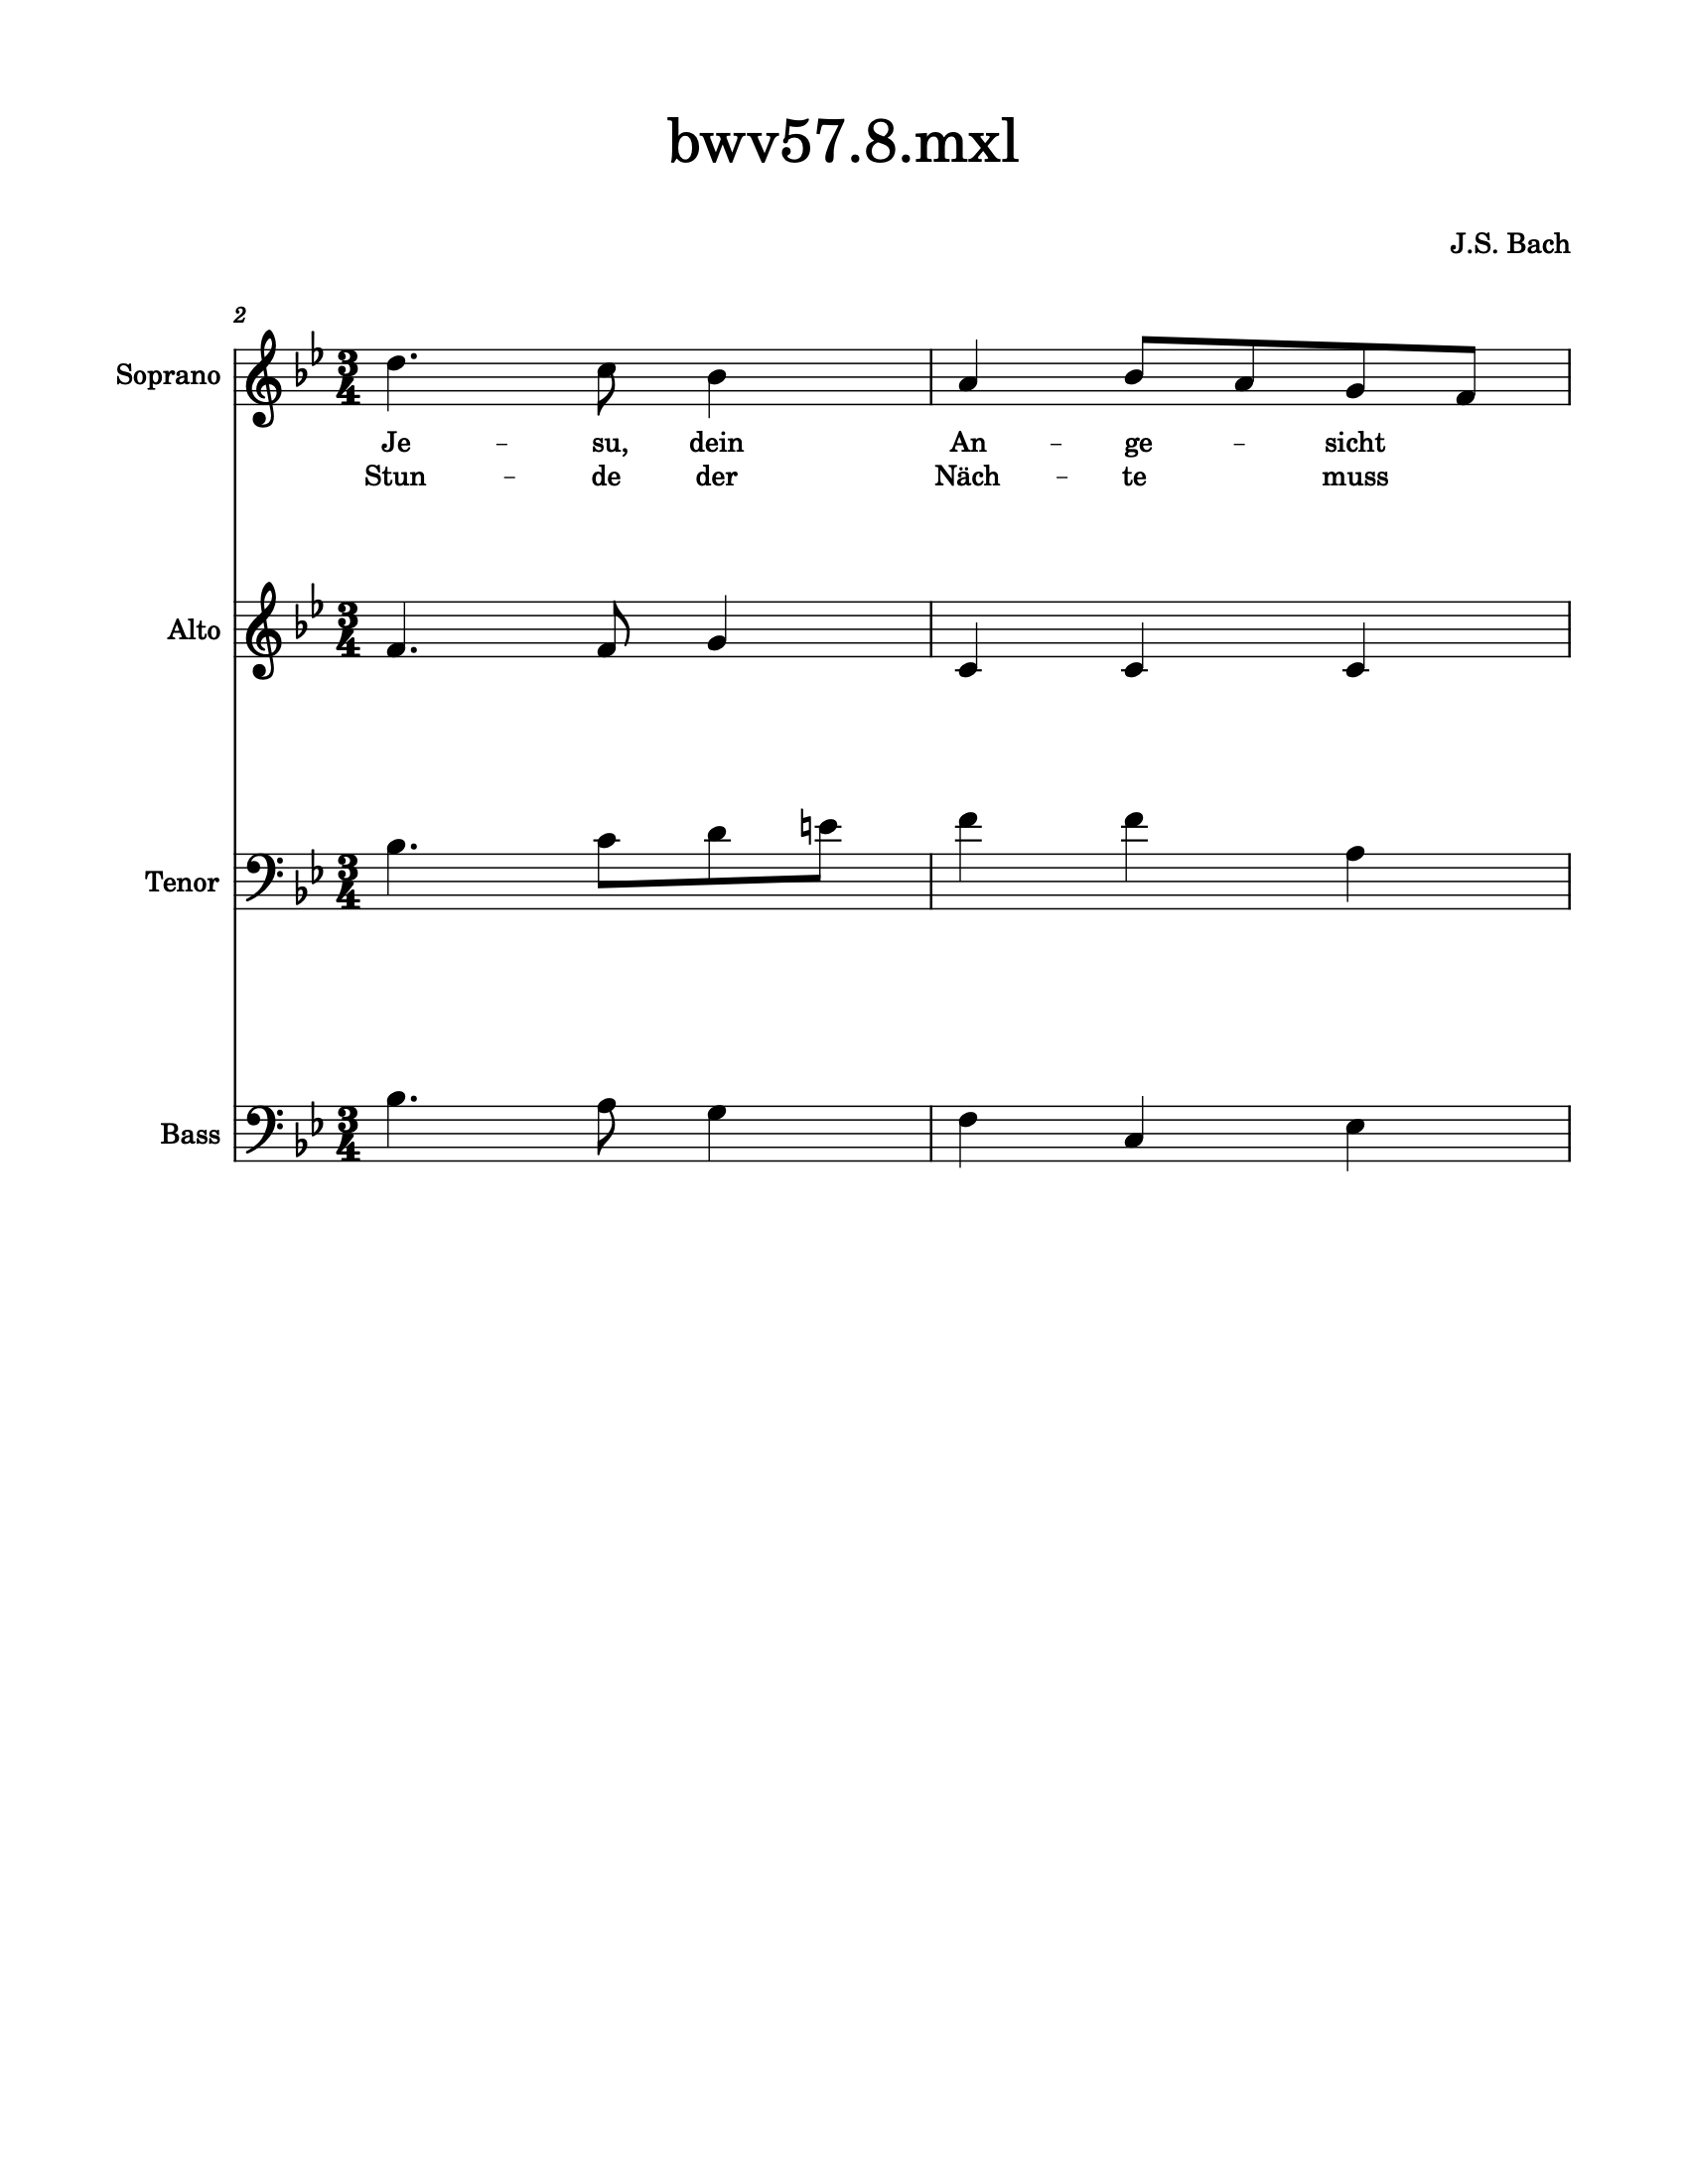

In [6]:
measureStack = sBach.measures(2, 3)
measureStack.show()

In [11]:
len(sBach.flat.getElementsByClass(note.Note))
#Flatten is changed  I guess
print(len(sBach[3][1]))
print(len(sBach.getElementsByClass(stream.Part)))
print(len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure)))
print(len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(
        stream.Measure)[1].getElementsByClass(note.Note)))

7
4
13
3


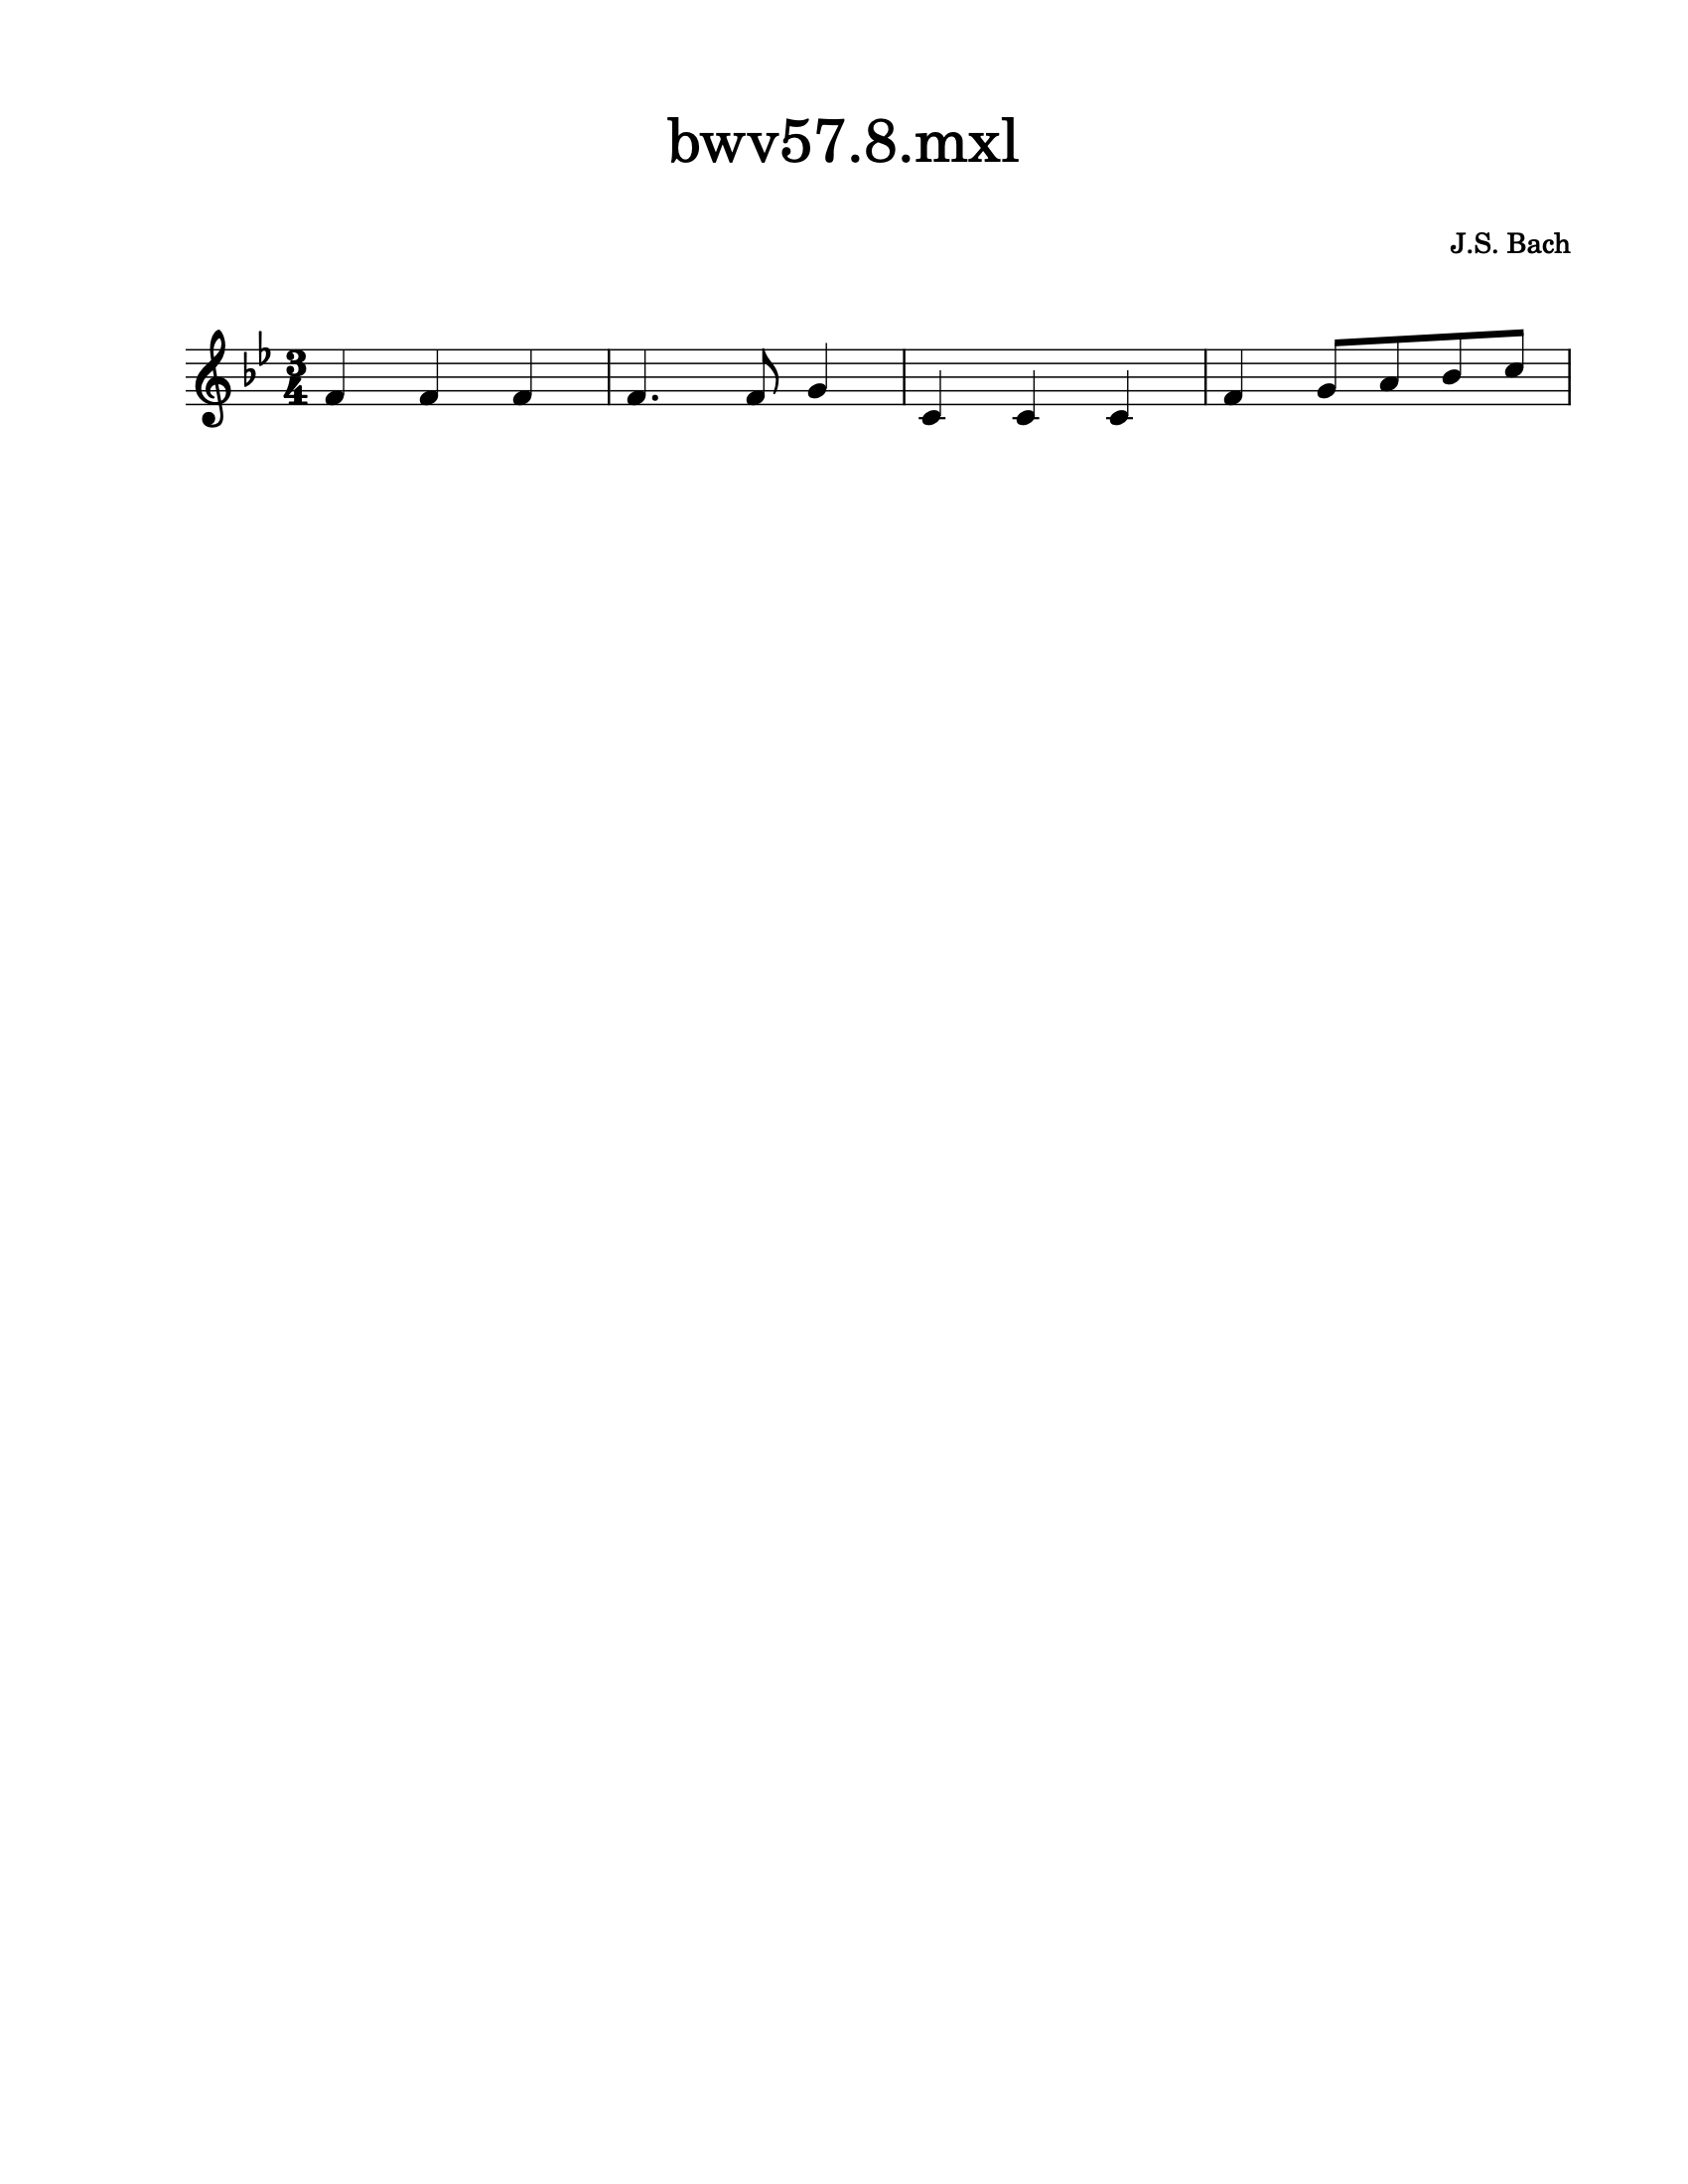

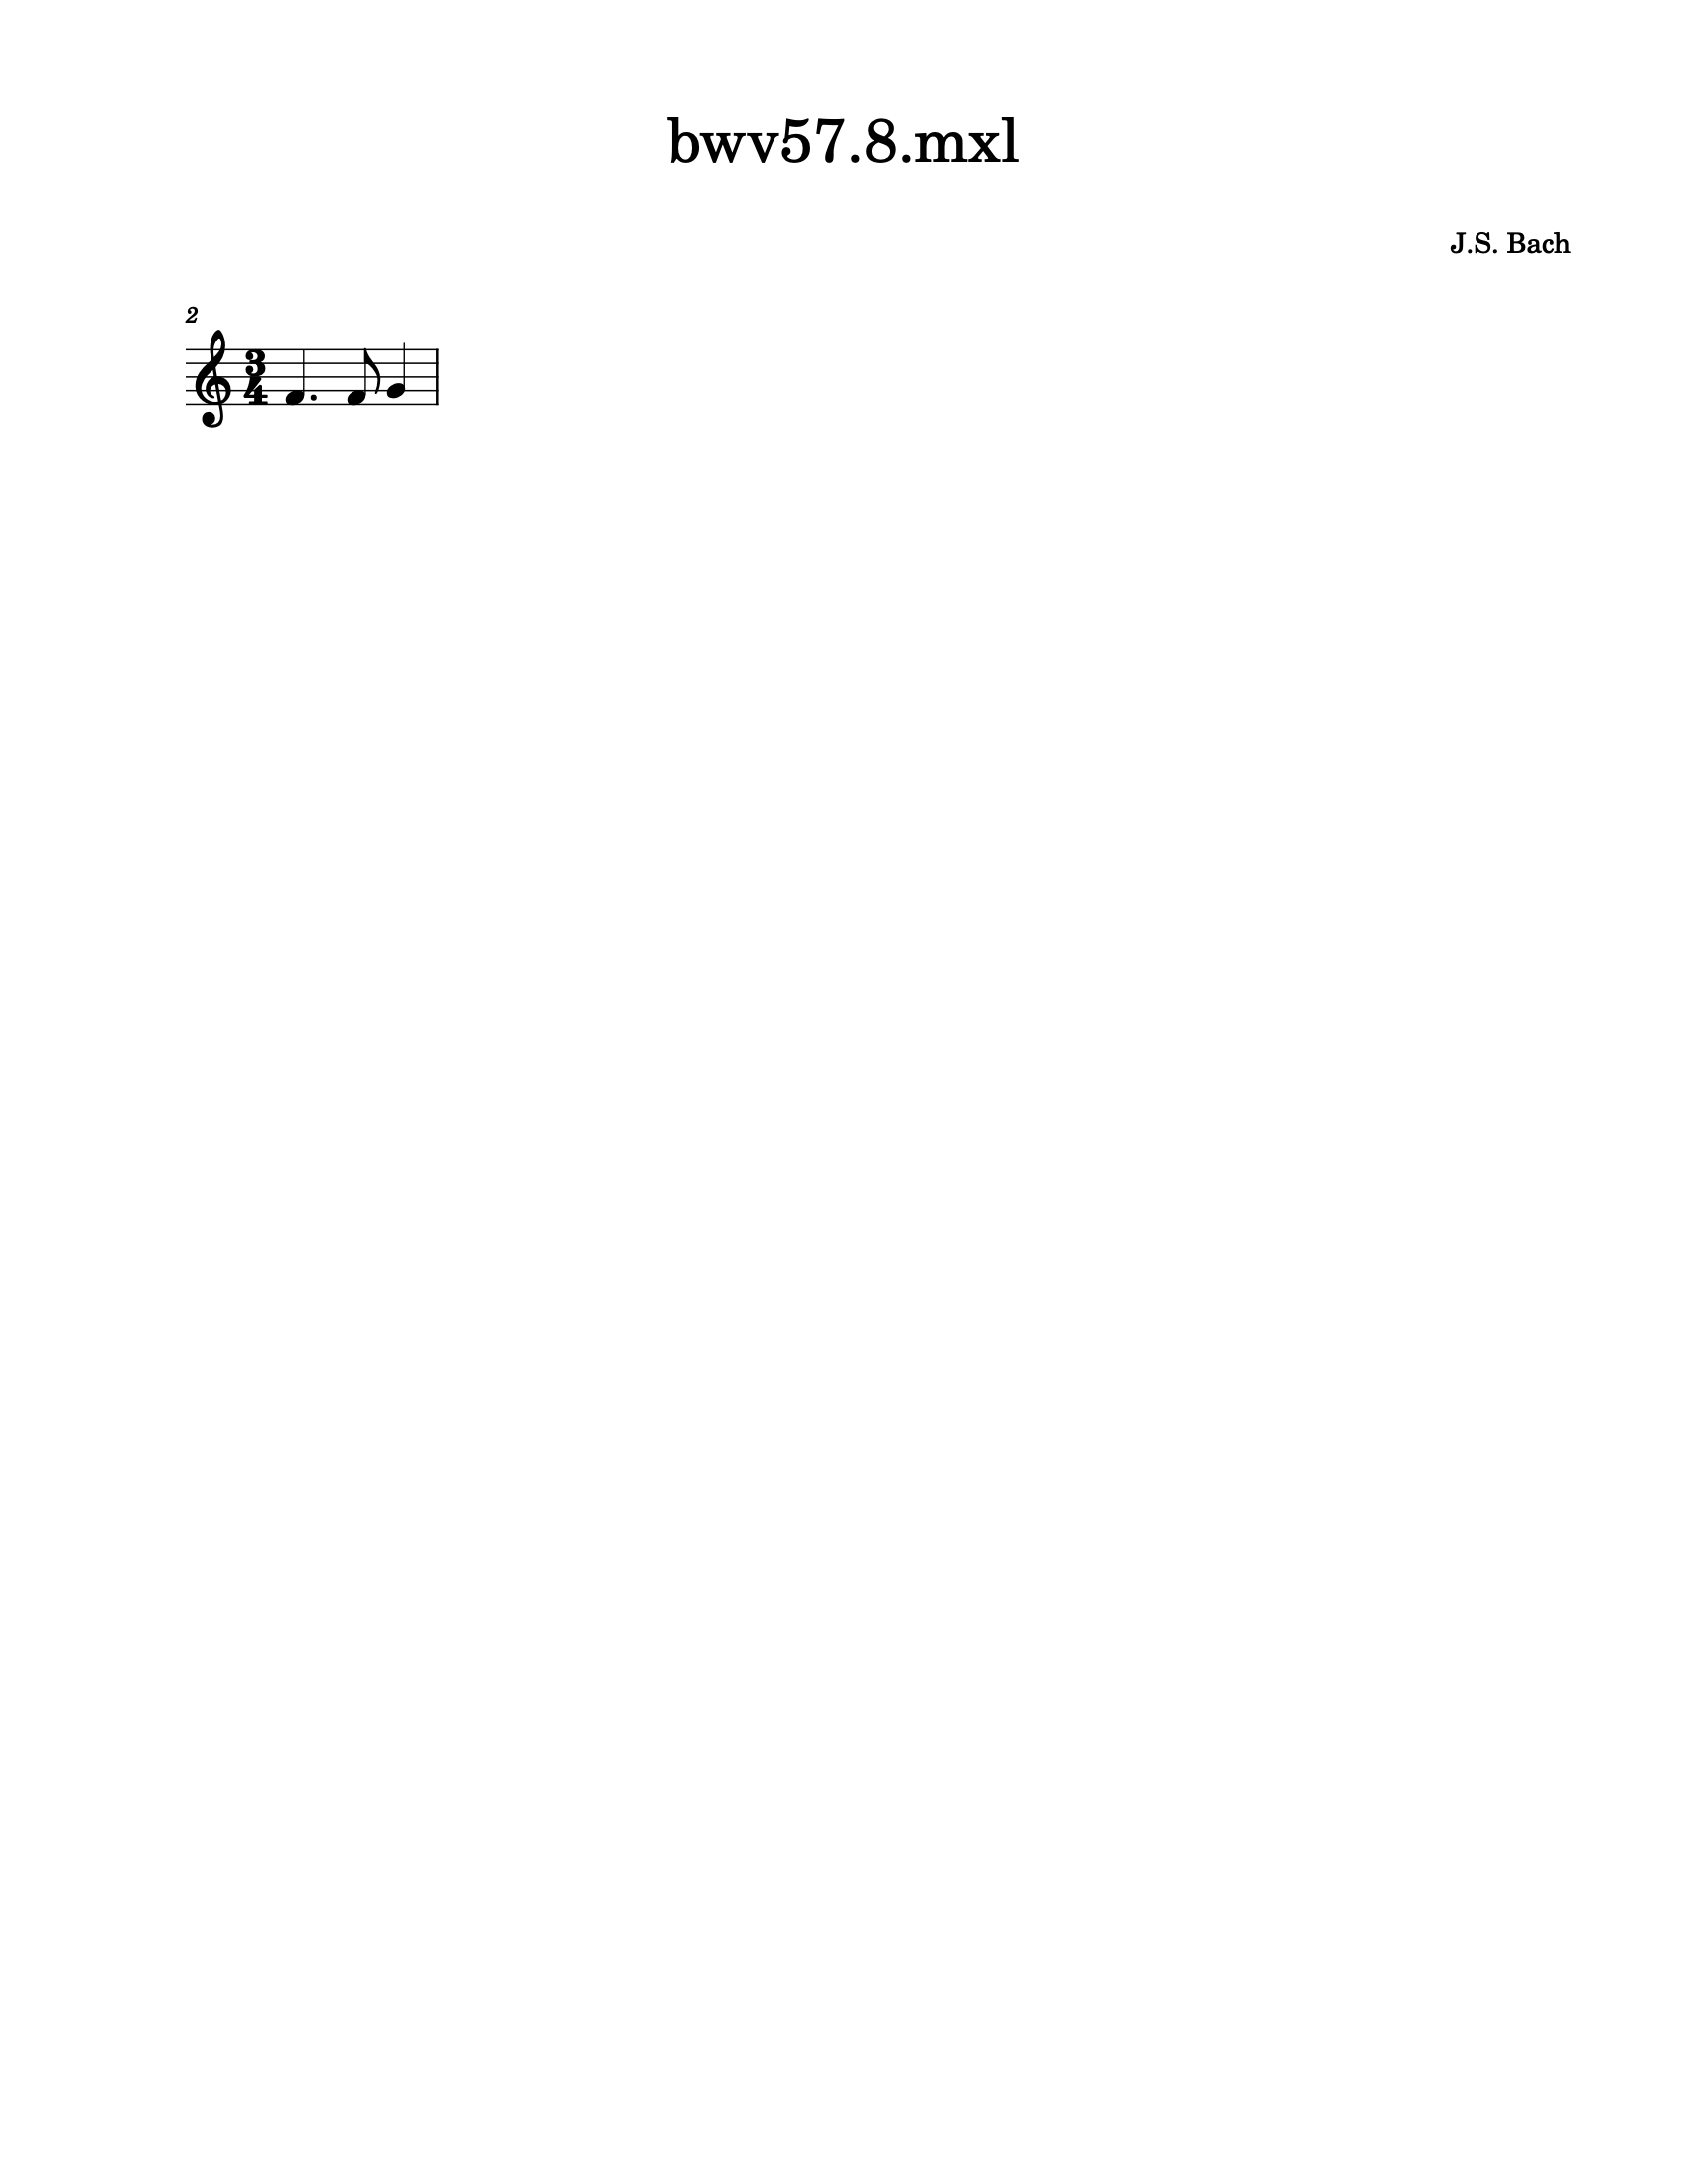

In [13]:
alto = sBach.parts[1]  # parts count from zero, so soprano is 0 and alto is 1
excerpt = alto.measures(1, 4)
excerpt.show()
measure2 = alto.measure(2)  # measure not measure_s_
measure2.show()

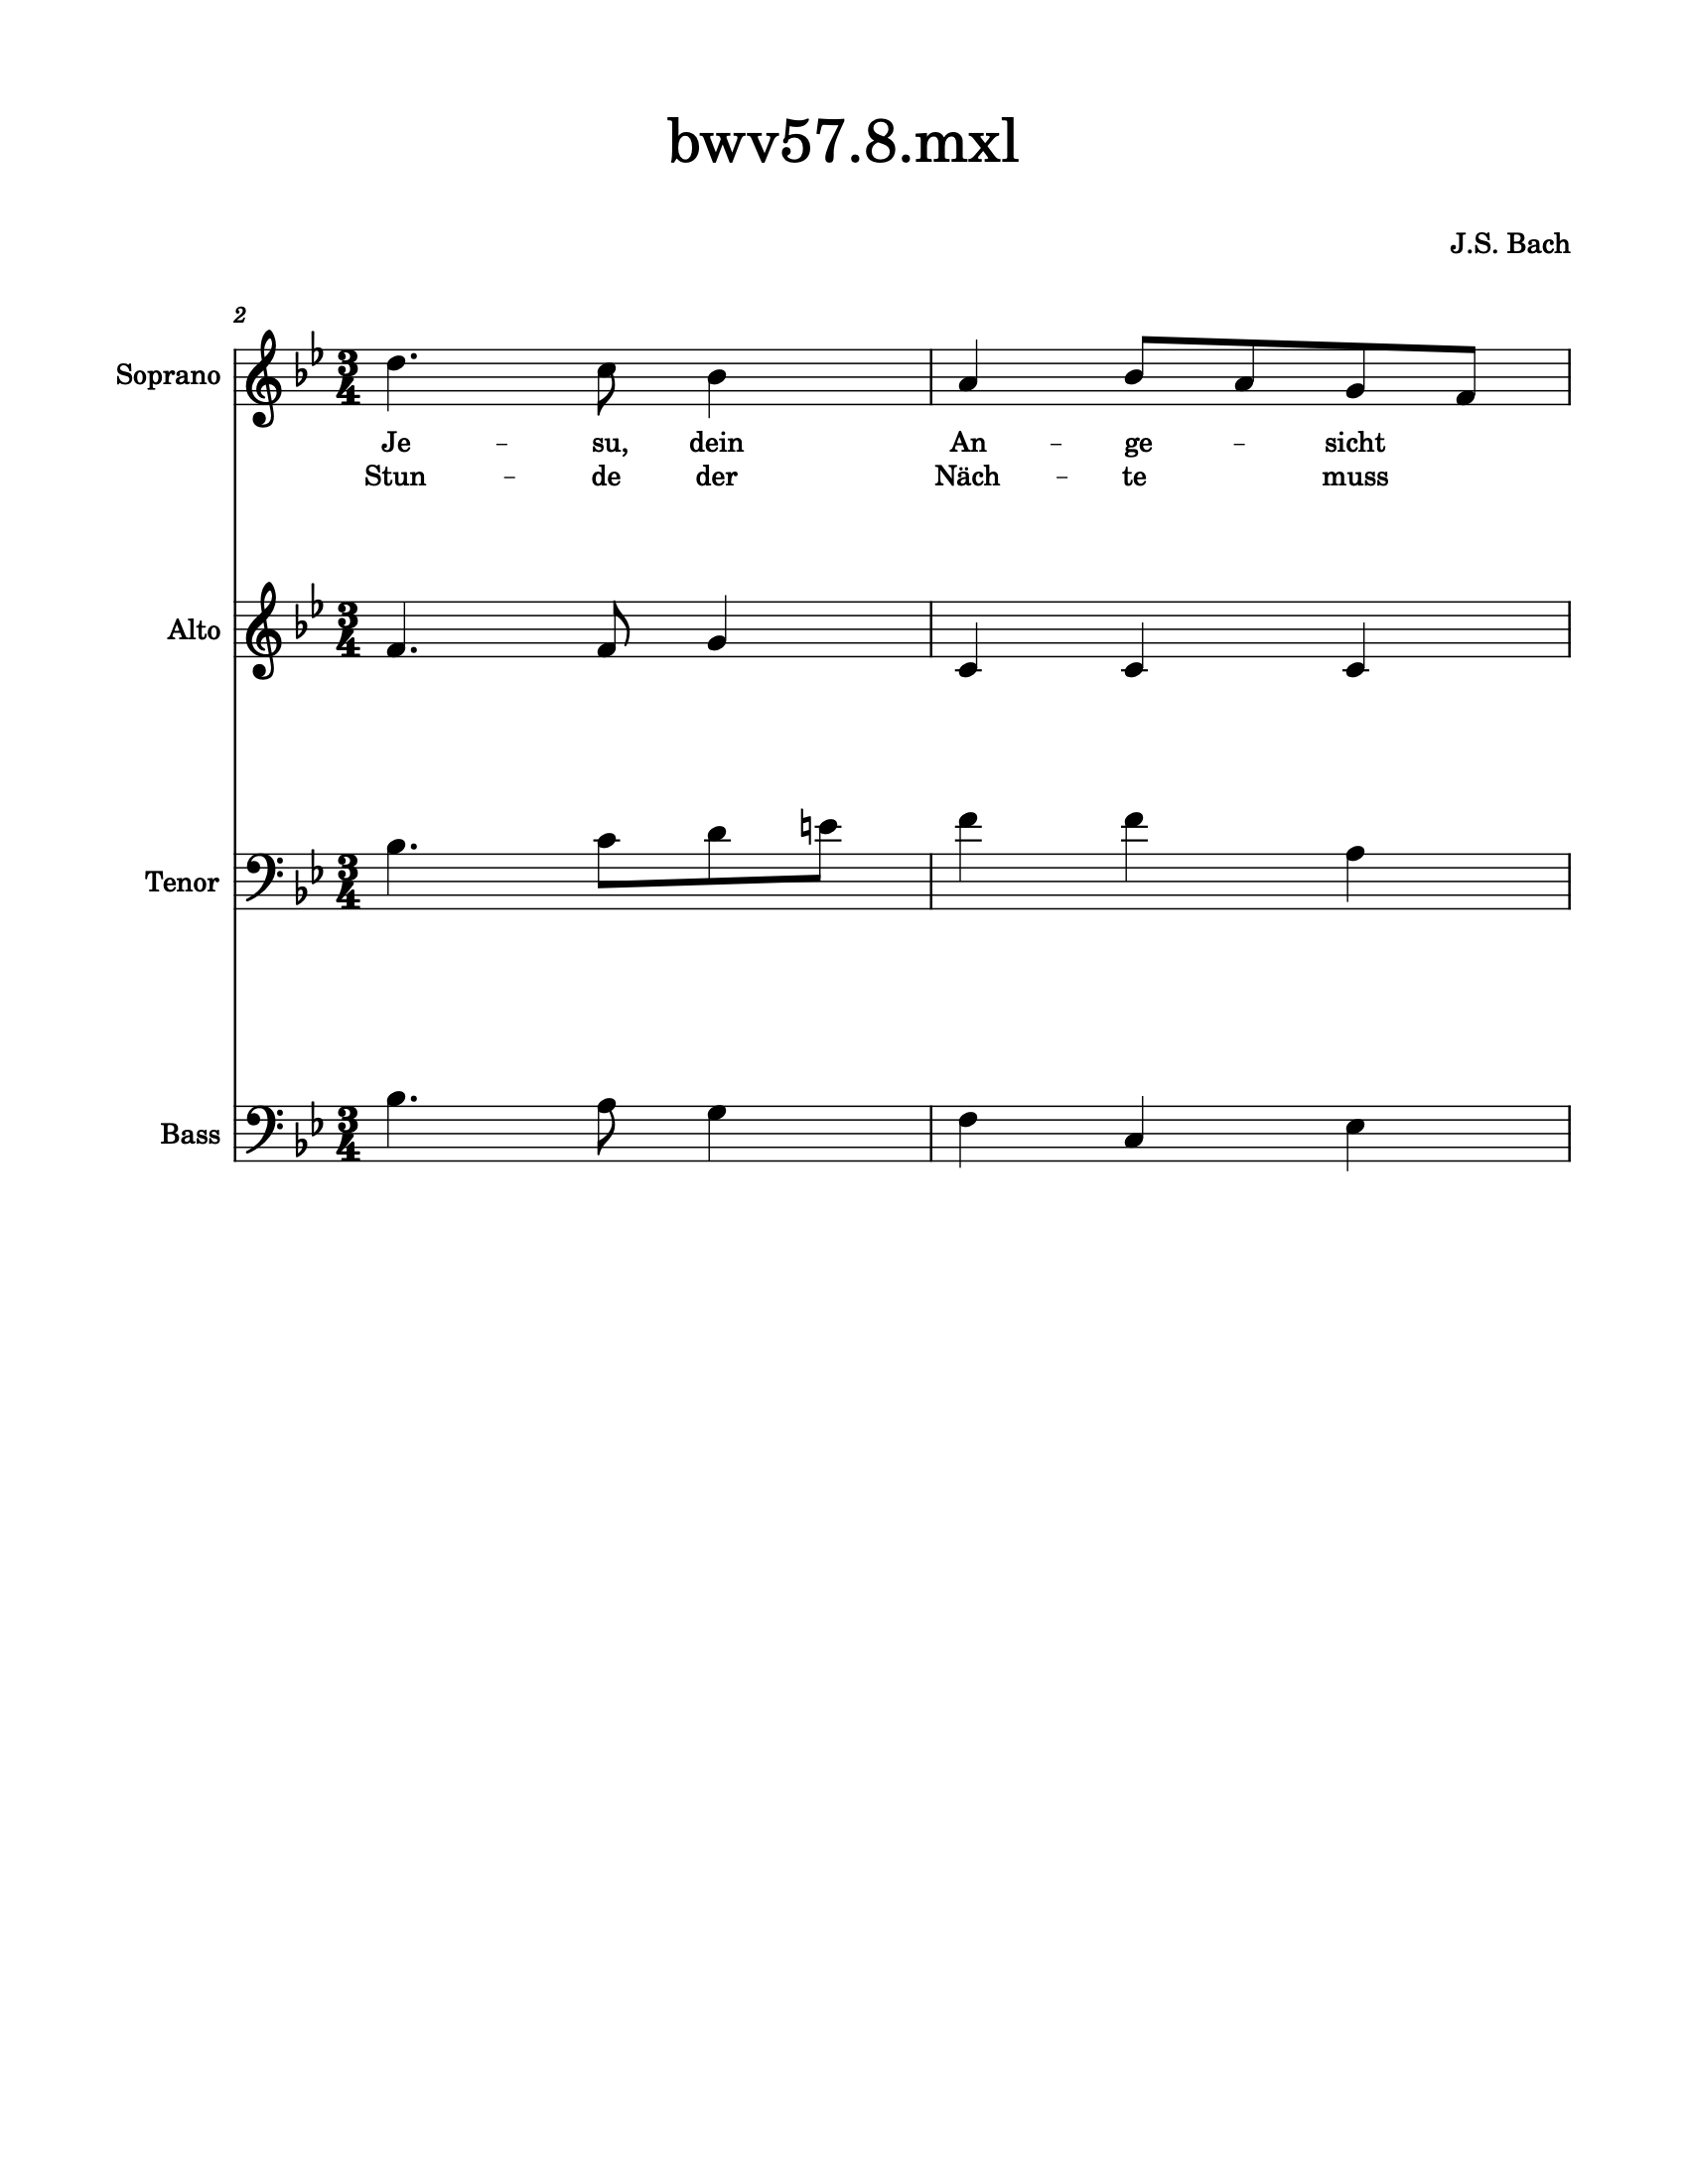

In [14]:
measureStack = sBach.measures(2, 3)
measureStack.show()

{0.0} <music21.stream.Part part0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note C>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note D>
{0.0} <music21.stream.Part part1>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note E>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note F>


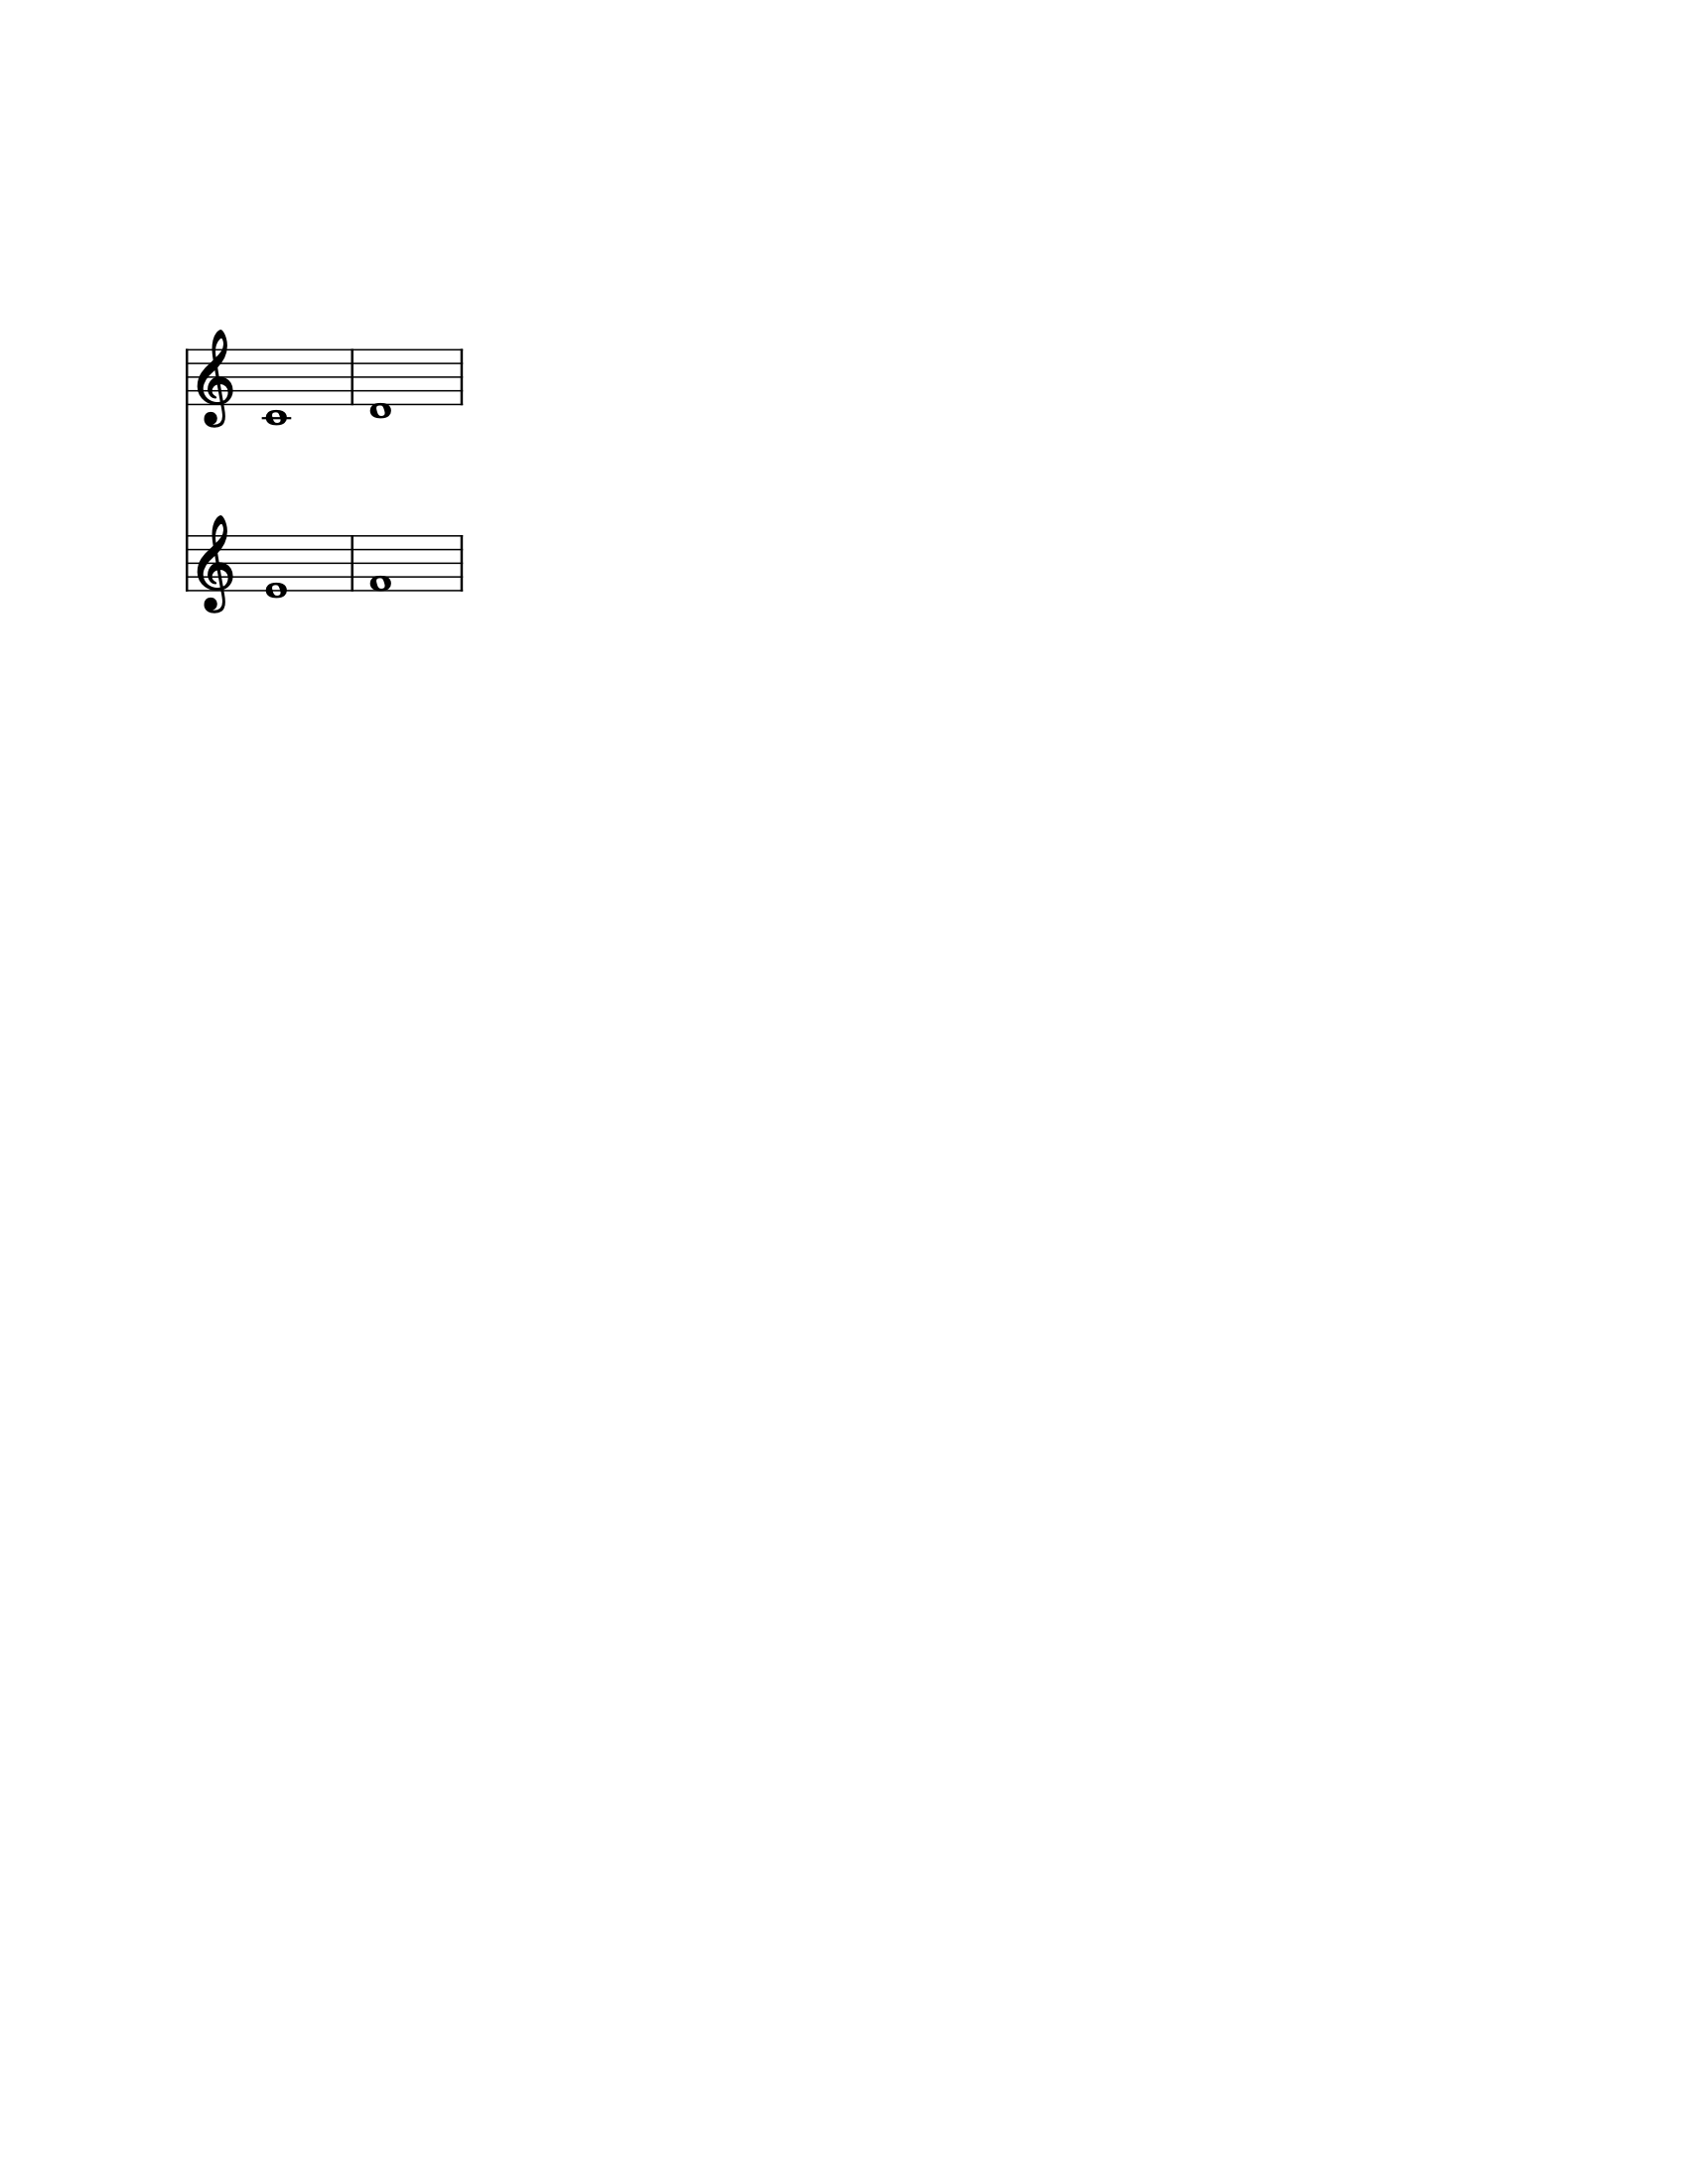

In [16]:
s = stream.Score(id='mainScore')
p0 = stream.Part(id='part0')
p1 = stream.Part(id='part1')

m01 = stream.Measure(number=1)
m01.append(note.Note('C', type="whole"))
m02 = stream.Measure(number=2)
m02.append(note.Note('D', type="whole"))
p0.append([m01, m02])

m11 = stream.Measure(number=1)
m11.append(note.Note('E', type="whole"))
m12 = stream.Measure(number=2)
m12.append(note.Note('F', type="whole"))
p1.append([m11, m12])

s.insert(0, p0)
s.insert(0, p1)
s.show('text')
s.show()

In [29]:
recurseScore = s.recurse()
recurseScore
for el in s.recurse():
    print(el.offset, el, el.activeSite)
print("")
for el in s.recurse().notes:
    print(el.offset, el, el.activeSite)
listRecurse = list(sBach.recurse())
for el in s.flat:
    print(el.offset, el, el.activeSite)
print(len(sBach.getElementsByClass(note.Note)))
print(len(sBach.flat.getElementsByClass(note.Note)))






0.0 <music21.stream.Part part0> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part0>
0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.stream.Part part1> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part1>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part1>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>

0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.note.Note C> <music21.stream.Score mainScore_flat>
0.0 <music21.

In [30]:
m = sBach.parts[0].getElementsByClass('Measure')[7]
m.getOffsetBySite(sBach.parts[0])

21.0

In [31]:
n = sBach.parts[0].measure(8).notes[1]
n

<music21.note.Note E->

In [34]:
n.getOffsetBySite(m)
pFlat = sBach.parts[0].flat
indexN = pFlat.index(n)
pFlat[indexN]
pFlat[indexN].offset


22.0